In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing, svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
dataset = np.genfromtxt('C:/Users/shash/Desktop/Fall 2017/Machine Learning/Exam Datasets/classification_data2.txt')

## Transforming given dataset
The given dataset is in .txt format, which is made into a dataframe.

In [3]:
df = pd.DataFrame(data = dataset[1:, 0:], columns = ['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel', 'Asymm Coef', 'KGL', 'Type'])
y = df.iloc[:, 7:8]
df.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymm Coef,KGL,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


## Data Exploration

In [4]:
df.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymm Coef,KGL,Type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [5]:
corr_matrix = df.corr()
print("Correlation matrix: ")
corr_matrix

Correlation matrix: 


,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymm Coef,KGL,Type
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Length of Kernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Width of Kernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymm Coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
KGL,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [6]:
y.head()

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [7]:
df.head()
X = df.iloc[:,:7]
X.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymm Coef,KGL
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


## Dimensionality reduction
PCA is used to reduce dimensionality of the X dataframe, so that all values have been reduced to 2 dimensions

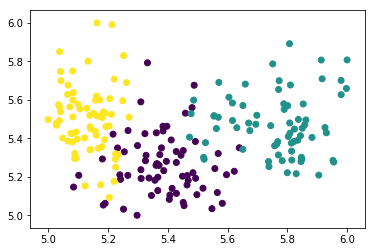

In [8]:
pca = PCA(n_components = 2) #Creating object
pca.fit(X) #Fitting the model
X_2d = pca.transform(X) #Transforming X
scaled0 = (X_2d[:,0]-min(X_2d[:,0]))/(max(X_2d[:,0])-min(X_2d[:,0])) #scaled all rows between 0 and 1
scaled1 = (X_2d[:,1]-min(X_2d[:,1]))/(max(X_2d[:,1])-min(X_2d[:,1])) #scaled all columns between 0 and 1
X_2d[:,0] = scaled0 + 5 #added a margin of 5
X_2d[:,1] = scaled1 + 5 #to the rows and columns
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, marker = 'o')

In [9]:
# temp_df = df.values #Storing dataframe in temp_df
# MMS = preprocessing.MinMaxScaler() #MMS object created for the MinMaxScaler() method
# scaled_var = MMS.fit_transform(temp_df) #temp_df transformed, scaled and stored in scaled_var 

## Defining the confusion matrix

In [10]:
def Confusion(y_test, y_pred):
    conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
    return conf_matrix

## Defining R squared error

In [11]:
def RSquared(y_test, y_pred):
    score = r2_score(y_true=y_test, y_pred=y_pred)
    return score

## Splitting the data
The dataset needs to be split into training and testing set, as the learning algorithm needs to be first trained on the training data. The argument 'test_size=0.2' splits the dataset as 80% training and 20% testing. Once the algorithm is trained, it can be used for prediction using the testing data.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size = 0.2, random_state=1)

## Logistic Regression

In [13]:
logistic = LogisticRegression(penalty = 'l1', C = 1) #Creating object

In [14]:
logistic = logistic.fit(X_train, y_train) #Fitting the model

In [15]:
log_pred = logistic.predict(X_test) #Predicting values

In [16]:
Confusion(y_test, log_pred)

array([[ 7,  9,  4],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [17]:
RSquared(y_test, log_pred)

0.21465968586387429

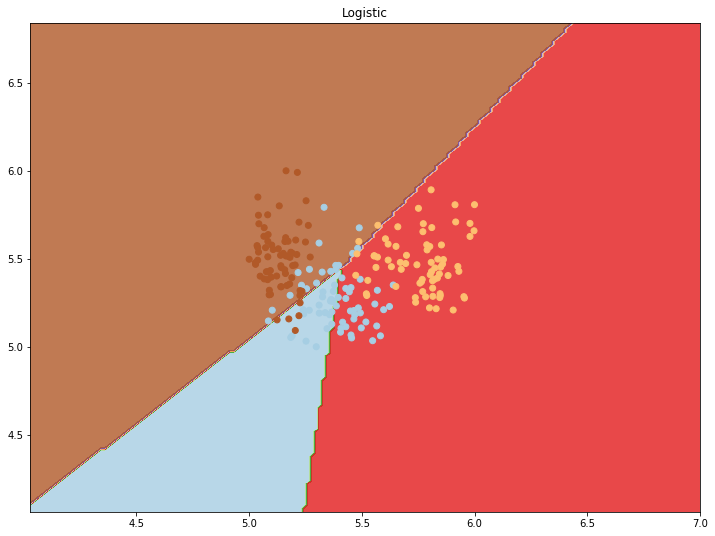

In [18]:
#Plotting data
Min_X, Max_X = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
Min_y, Max_y = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
h = (Max_X / Min_X)/100
XX, yy= np.meshgrid(np.arange(Min_X, Max_X, h), np.arange(Min_y, Max_y, h))
f, ax = plt.subplots(figsize = (12,9))
log_pred = pred = logistic.predict(np.c_[XX.ravel(), yy.ravel()])
pred = log_pred.reshape(XX.shape)
plt.contourf(XX, yy, pred, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(XX.min(), XX.max())
plt.title('Logistic')
plt.show()

## Soft Margin SVM
Soft margin uses the default value of C, which is 1.0 to classify the data. 
A low value of C generally means that the boundary lines between separation of different classes will not be as accurate.

### Linear Kernel

In [19]:
clf_linear = svm.SVC(kernel = 'linear') #Creating object

In [20]:
clf_linear = clf_linear.fit(X_train, y_train) #Fitting the model

In [21]:
clf_pred = clf_linear.predict(X_test) #Predicting values

In [22]:
Confusion(y_test, clf_pred)

array([[17,  1,  2],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [23]:
RSquared(y_test, clf_pred)

0.7172774869109948

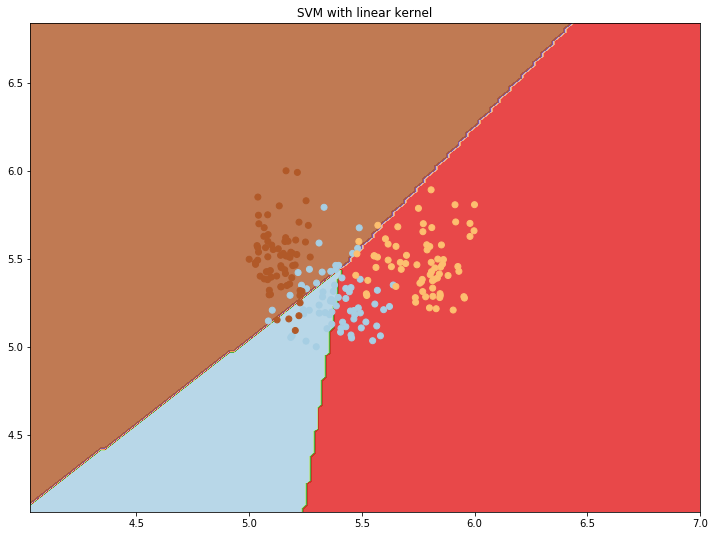

In [24]:
Min_X, Max_X = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
Min_y, Max_y = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
h = (Max_X / Min_X)/100
XX, yy= np.meshgrid(np.arange(Min_X, Max_X, h), np.arange(Min_y, Max_y, h))
f, ax = plt.subplots(figsize = (12,9))
clf_pred = pred = logistic.predict(np.c_[XX.ravel(), yy.ravel()])
pred = clf_pred.reshape(XX.shape)
plt.contourf(XX, yy, pred, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(XX.min(), XX.max())
plt.title('SVM with linear kernel')
plt.show()

### Polynomial Kernel

In [25]:
clf_poly = svm.SVC(kernel = 'poly', gamma = 0.5) #Creating object

In [26]:
clf_poly = clf_poly.fit(X_train, y_train) #Fitting model
type(clf_poly)

sklearn.svm.classes.SVC

In [27]:
clf_pred = clf_poly.predict(X_test) #Predicting values

In [28]:
Confusion(y_test, clf_pred)

array([[18,  1,  1],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [29]:
RSquared(y_test, clf_pred)

0.84293193717277481

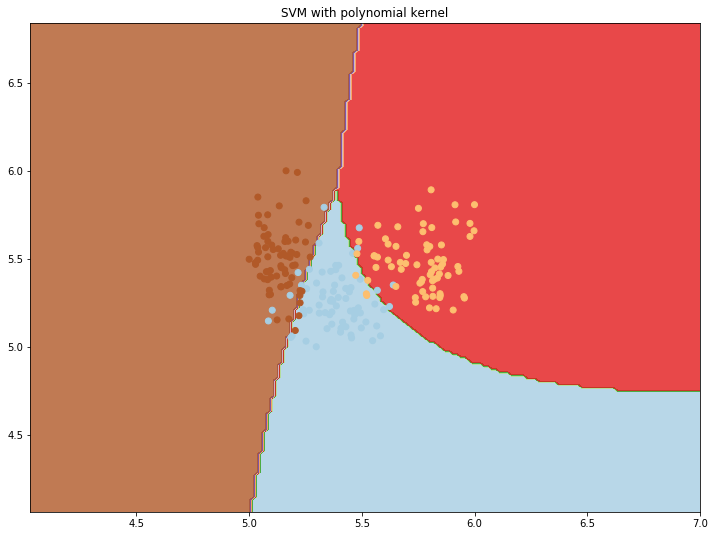

In [30]:
Min_X, Max_X = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
Min_y, Max_y = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
h = (Max_X / Min_X)/100
XX, yy= np.meshgrid(np.arange(Min_X, Max_X, h), np.arange(Min_y, Max_y, h))
f, ax = plt.subplots(figsize = (12,9))
clf_pred = clf_poly.predict(np.c_[XX.ravel(), yy.ravel()])
clf_pred = clf_pred.reshape(XX.shape)
plt.contourf(XX, yy, clf_pred, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(XX.min(), XX.max())
plt.title('SVM with polynomial kernel')
plt.show()

### Gaussian Kernel

In [31]:
clf_gauss = svm.SVC(kernel = 'rbf', gamma = 0.5) #Creating object

In [32]:
clf_gauss = clf_gauss.fit(X_train, y_train) #Fitting model

In [33]:
clf_pred = clf_gauss.predict(X_test) #Making predictions

In [34]:
Confusion(y_test, clf_pred)

array([[17,  1,  2],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [35]:
RSquared(y_test, clf_pred)

0.7172774869109948

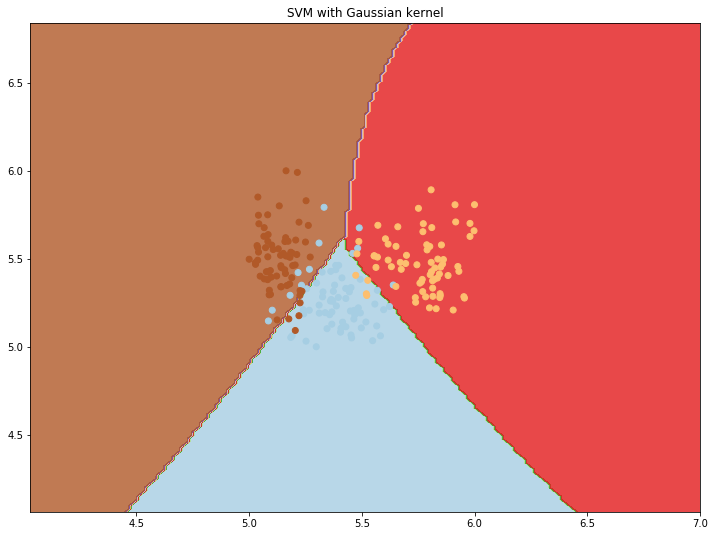

In [36]:
Min_X, Max_X = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
Min_y, Max_y = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
h = (Max_X / Min_X)/100
XX, yy= np.meshgrid(np.arange(Min_X, Max_X, h), np.arange(Min_y, Max_y, h))
f, ax = plt.subplots(figsize = (12,9))
clf_pred = clf_gauss.predict(np.c_[XX.ravel(), yy.ravel()])
clf_pred = clf_pred.reshape(XX.shape)
plt.contourf(XX, yy, clf_pred, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(XX.min(), XX.max())
plt.title('SVM with Gaussian kernel')
plt.show()

## Hard Margin SVM

### Linear Kernel

In [37]:
clf_linear = svm.SVC(kernel = 'linear', C=1000, max_iter=1000) #Creating object

In [38]:
clf_linear = clf_linear.fit(X_train, y_train) #Fitting model

In [39]:
clf_pred = clf_linear.predict(X_test) #Making predictions

In [40]:
Confusion(y_test, clf_pred)

array([[18,  1,  1],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [41]:
RSquared(y_test, clf_pred)

0.84293193717277481

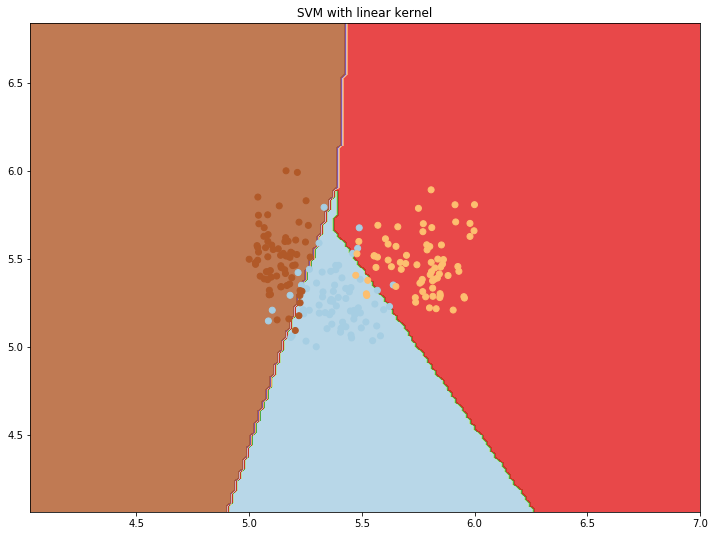

In [42]:
Min_X, Max_X = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
Min_y, Max_y = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
h = (Max_X / Min_X)/100
XX, yy= np.meshgrid(np.arange(Min_X, Max_X, h), np.arange(Min_y, Max_y, h))
f, ax = plt.subplots(figsize = (12,9))
clf_pred = clf_linear.predict(np.c_[XX.ravel(), yy.ravel()])
clf_pred = clf_pred.reshape(XX.shape)
plt.contourf(XX, yy, clf_pred, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(XX.min(), XX.max())
plt.title('SVM with linear kernel')
plt.show()

### Polynomial Kernel

In [43]:
clf_poly = svm.SVC(kernel = 'poly', C=1000, max_iter=1000) #Creating object

In [44]:
clf_poly = clf_poly.fit(X_train, y_train) #Fitting model

In [45]:
clf_pred = clf_poly.predict(X_test) #Making predictions

In [46]:
Confusion(y_test, clf_pred)

array([[8, 9, 3],
       [0, 9, 0],
       [8, 0, 5]])

In [47]:
RSquared(y_test, clf_pred)

-0.66492146596858648

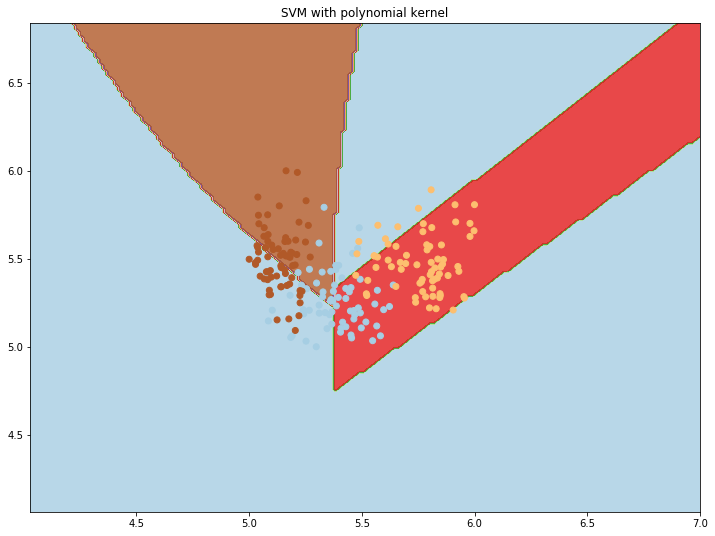

In [48]:
Min_X, Max_X = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
Min_y, Max_y = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
h = (Max_X / Min_X)/100
XX, yy= np.meshgrid(np.arange(Min_X, Max_X, h), np.arange(Min_y, Max_y, h))
f, ax = plt.subplots(figsize = (12,9))
clf_pred = clf_poly.predict(np.c_[XX.ravel(), yy.ravel()])
clf_pred = clf_pred.reshape(XX.shape)
plt.contourf(XX, yy, clf_pred, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(XX.min(), XX.max())
plt.title('SVM with polynomial kernel')
plt.show()

### Gaussian Kernel

In [49]:
clf_gauss = svm.SVC(kernel = 'rbf', C=1000, max_iter=1000) #Creating object

In [50]:
clf_gauss = clf_gauss.fit(X_train, y_train) #Fitting model

In [51]:
clf_pred = clf_gauss.predict(X_test) #Making predictions

In [52]:
Confusion(y_test, clf_pred)

array([[18,  1,  1],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [53]:
RSquared(y_test, clf_pred)

0.84293193717277481

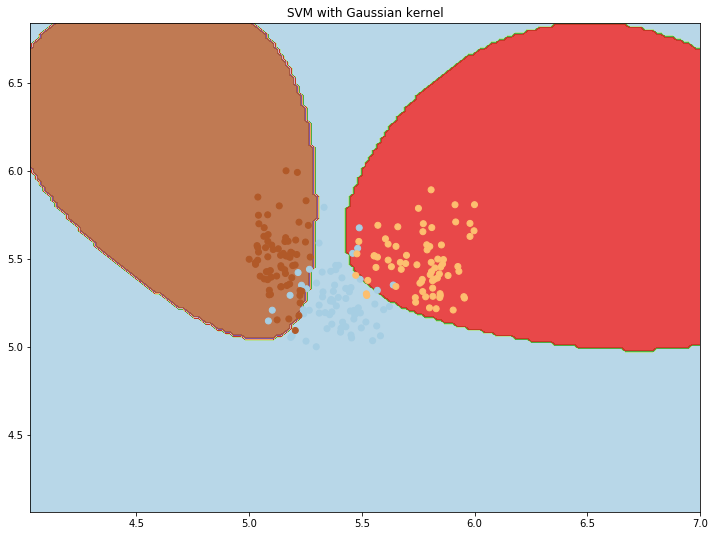

In [54]:
Min_X, Max_X = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
Min_y, Max_y = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
h = (Max_X / Min_X)/100
XX, yy= np.meshgrid(np.arange(Min_X, Max_X, h), np.arange(Min_y, Max_y, h))
f, ax = plt.subplots(figsize = (12,9))
clf_pred = clf_gauss.predict(np.c_[XX.ravel(), yy.ravel()])
clf_pred = clf_pred.reshape(XX.shape)
plt.contourf(XX, yy, clf_pred, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(XX.min(), XX.max())
plt.title('SVM with Gaussian kernel')
plt.show()

# Kernelized Ridge Regression

## Linear Kernel

In [55]:
#Linear Kernel
kr = GridSearchCV(KernelRidge(kernel = 'linear', gamma = 1), cv = 5, param_grid = {"degree": [2, 4, 7]})

In [56]:
kr = kr.fit(X_train, y_train)

In [57]:
y_pred = kr.predict(X_test)
y_pred=pd.DataFrame(y_pred)
type(y_test)

pandas.core.frame.DataFrame

In [58]:
RSquared(y_test, y_pred)

0.32876428366412958

## Polynomial Kernel

In [59]:
#Polynomial Kernel
kr_poly = GridSearchCV(KernelRidge(kernel = 'poly', gamma = 1), cv = 5, param_grid = {"degree": [2, 3, 4]})

In [60]:
kr_poly = kr_poly.fit(X_train, y_train)

In [61]:
y_pred = kr_poly.predict(X_test)

In [62]:
RSquared(y_test, y_pred)

0.6583887186196673

## Gaussian Kernel

In [63]:
#Polynomial Kernel
kr_gauss = GridSearchCV(KernelRidge(kernel = 'rbf'), cv = 5, param_grid = {"gamma": [0.1,0.5,1,2,4]})

In [64]:
kr_gauss = kr_gauss.fit(X_train, y_train)

In [65]:
y_pred = kr_gauss.predict(X_test)

In [66]:
RSquared(y_test, y_pred)

0.73388212096846916

## Deciding the best model
Based on the R Squared errors, the best model is Hard Margin SVM using Gaussian Kernel, with RSquared of 0.842931